https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=getbbox#PIL.Image.Image.getbbox
`Image.getbbox()`
- 0(검정)이 아닌 영역의 경계 상자 표시
- 튜플 형태 좌표 리턴: (left, upper, right, lower) 

`ImageOps.invert(Image)`
- Invert (negate) the image.
- Image 리턴
- 255 - 본래 값 = 리턴 값

`Image.getbands()`
- e.g. RGB 이미지에서 tuple 형태로 ('R', 'G', 'B') 리턴

`Image.crop((left, upper, right, lower))`
- crop된 Image 리턴

# 결론
- 해당 코드는 불필요한 영역(흰색 종이 부분만 존재하는 영역)를 자르는 역할
- 하지만 이미 잘 bbox 잡힌 상태라, 적용되는 이미지는 단 2장, 그리고 효과 미비
 - train_19617.jpg: (`0`, 0, 4568, 609) => (`12`, 0, 4568, 609)
 - train_92532.jpg: (0, `0`, 795, 291) => (0, `8`, 795, 291)

In [3]:
import os
from glob import glob
from PIL import Image, ImageOps
from tqdm import tqdm
import numpy as np

In [2]:
# files = glob('/opt/ml/input/data/train_dataset/images/*')
# file = glob('/opt/ml/input/data/train_dataset/images/train_00000.jpg'):

In [ ]:
glob('/opt/ml/input/data/train_dataset/images/train_00000.jpg'):

In [ ]:
for f in glob('/opt/ml/input/data/train_dataset/images/*'):
    try:
        image = Image.open(f)
        image.convert("L")
        bounding_box = ImageOps.invert(image).getbbox()
        image = image.crop(bounding_box)
        image = image.resize((128, 128))
        name = f.split('/')[-1]
        
        image.save('/opt/ml/input/data/train_dataset/resized_gray_images/'+ name)
    except OSError as e:
        print(f'error at {f}: {e}')

In [4]:
lst = []
for f in tqdm(glob('/opt/ml/input/data/train_dataset/images/*')):
    temp_image = Image.open(f)
    coords = ImageOps.invert(temp_image.convert("L")).getbbox()
    if coords != (0, 0, temp_image.size[0], temp_image.size[1]):
        lst.append((f.split('/')[-1], coords))
        print(lst[-1])

  7%|▋         | 7132/100000 [01:29<15:04, 102.66it/s]

('train_19617.jpg', (12, 0, 4568, 609))


 76%|███████▋  | 76339/100000 [15:55<03:50, 102.59it/s]

('train_92532.jpg', (0, 8, 795, 291))


100%|██████████| 100000/100000 [20:58<00:00, 79.46it/s]


In [36]:
temp = Image.open('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg')
ImageOps.invert(temp).getbbox(), temp.size

((12, 0, 4568, 609), (4568, 609))

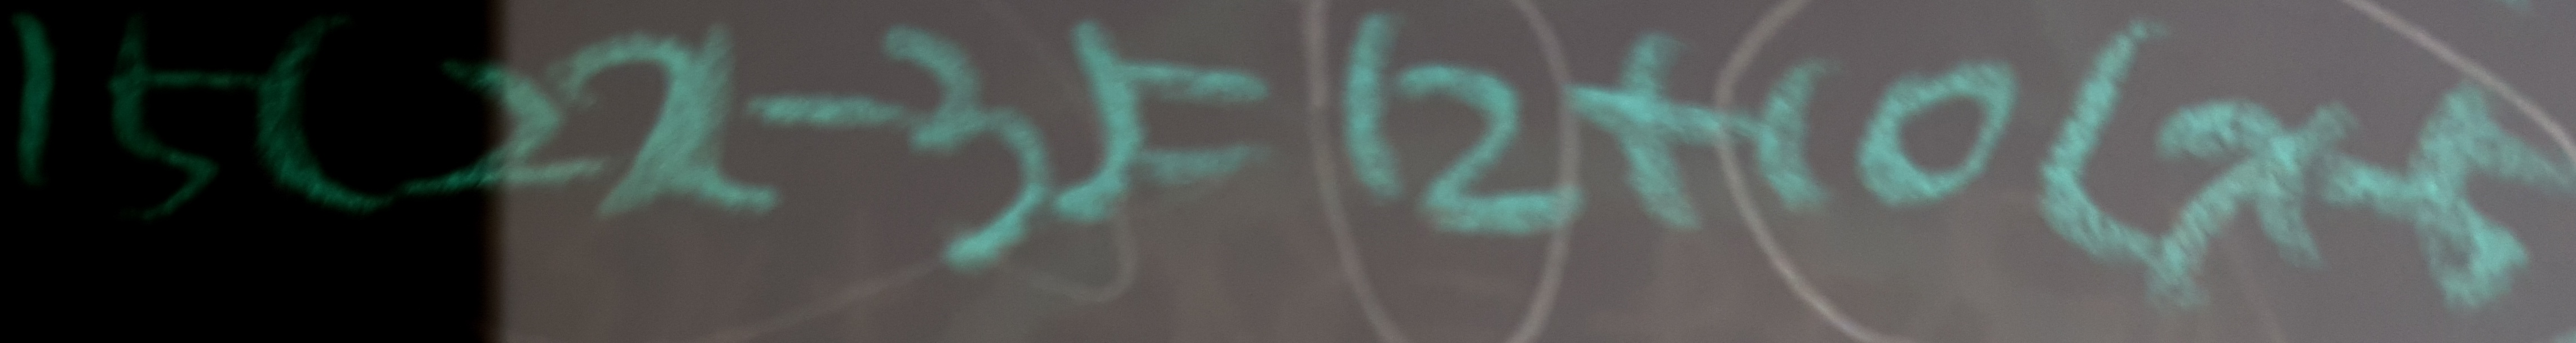

In [38]:
ImageOps.invert(temp)

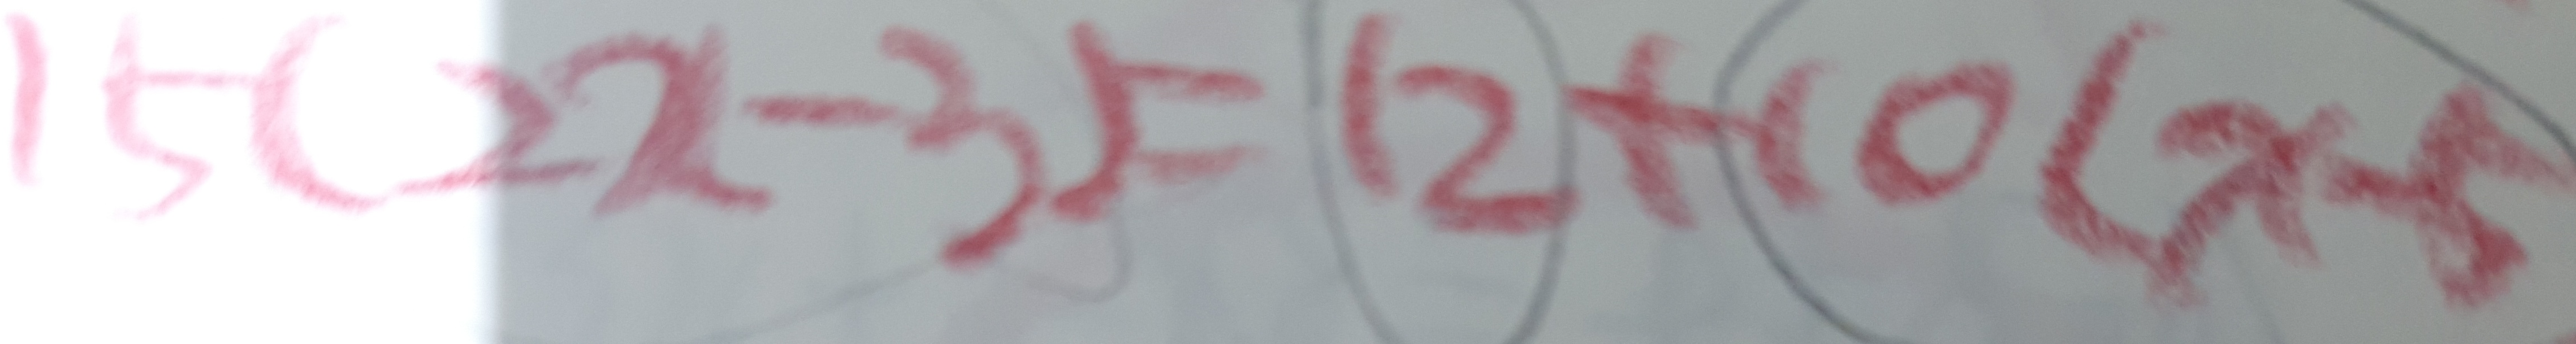

In [39]:
temp.crop(ImageOps.invert(temp).getbbox())

In [40]:
temp = Image.open('/opt/ml/input/data/train_dataset/images/' + 'train_92532.jpg')
ImageOps.invert(temp).getbbox(), temp.size

((0, 8, 795, 291), (795, 291))

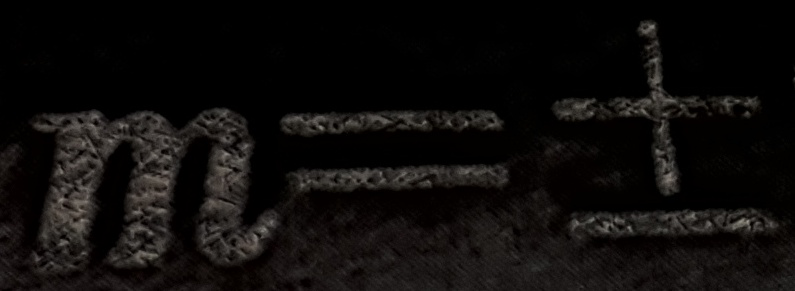

In [41]:
ImageOps.invert(temp)

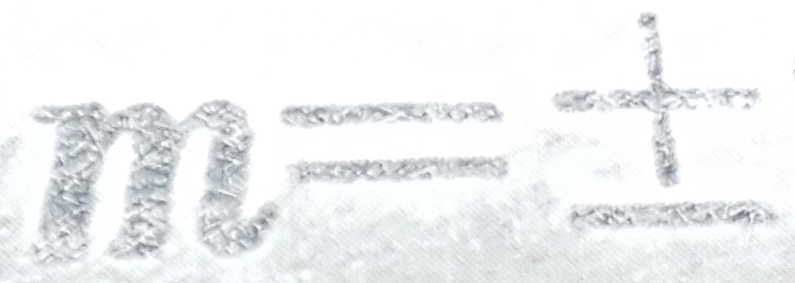

In [42]:
temp.crop(ImageOps.invert(temp).getbbox())

In [36]:
np.array(temp_image).shape

(301, 860, 3)

In [37]:
np.array(temp_image.convert("L")).shape

(301, 860)

In [5]:
import cv2
print(cv2.__version__)

4.5.2


In [9]:
sample.size

(4568, 609)

In [18]:
sample2 = Image.open('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg')
type(sample2)

(PIL.JpegImagePlugin.JpegImageFile,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4568x609 at 0x7F1F5E557410>)

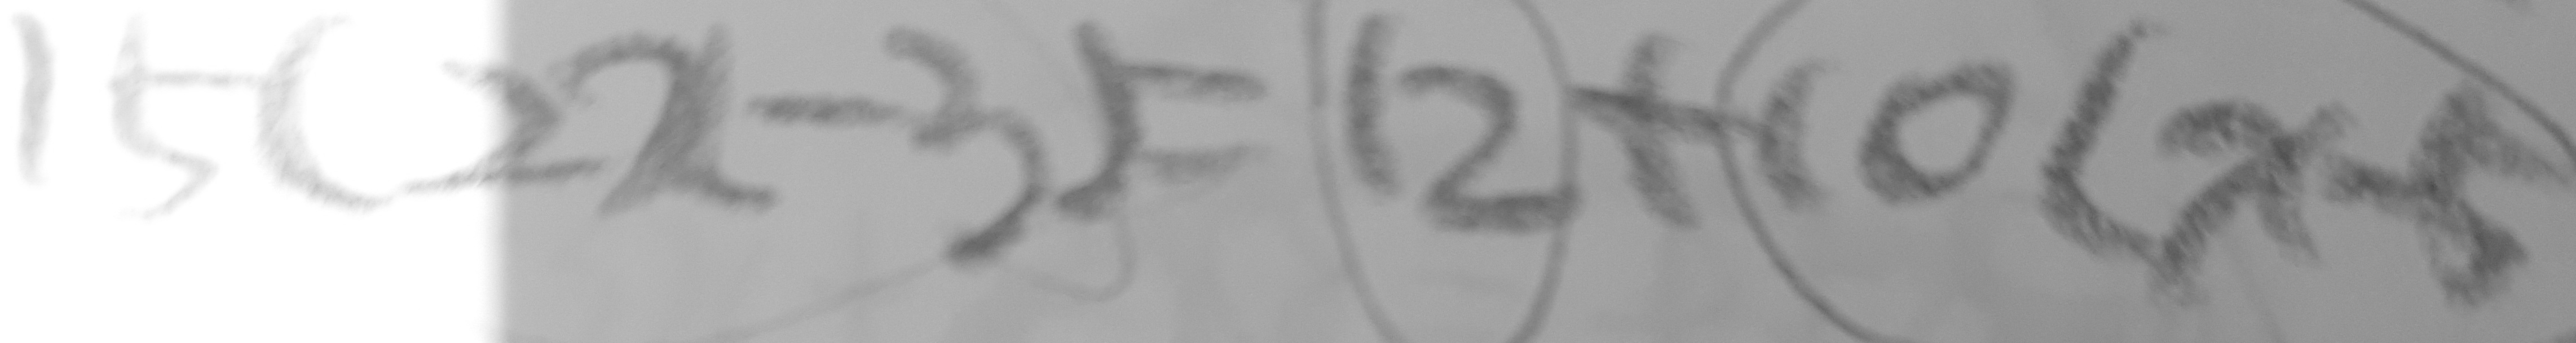

In [57]:
sample2.convert("L")

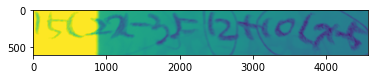

In [51]:
from matplotlib import pyplot as plt
sample = cv2.imread('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(sample)
plt.show()

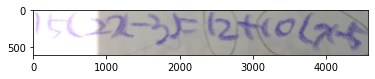

In [60]:
from matplotlib import pyplot as plt
# 1. cv2.imread로 이미지 읽어오기
sample = cv2.imread('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg', cv2.IMREAD_COLOR)
plt.imshow(sample)
plt.show()

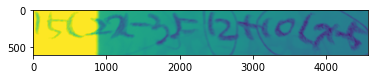

In [54]:
from matplotlib import pyplot as plt
sample = cv2.imread('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(sample)
plt.show()

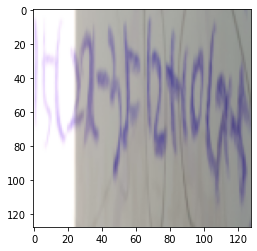

In [65]:
# 2. cv2.resize로 이미지 크기 조절하기
resized_sample = cv2.resize(sample, dsize=(128, 128), interpolation=cv2.INTER_AREA)
plt.imshow(resized_sample)
plt.show()

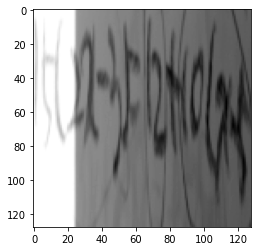

In [69]:
# 3. cv2.cvtColor로 gray 스케일로 변환
gray_sample = cv2.cvtColor(resized_sample, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_sample, cmap='gray')
plt.show()

In [72]:
gray_sample.shape

(128, 128)

In [73]:
# 4. cv2.imwrite로 저장하기
cv2.imwrite('/opt/ml/input/data/train_dataset/'+'gray_sample.jpg', gray_sample)

True

In [41]:
import time
start = time.time()
for _ in range(1000):
    cv2.resize(sample, dsize=(128, 128), interpolation=cv2.INTER_AREA)
end = time.time()
print(end - start)

10.481535196304321
